# Q3

In [92]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt

In [93]:
image = cv2.imread('face.jpg')[:,:,::-1]

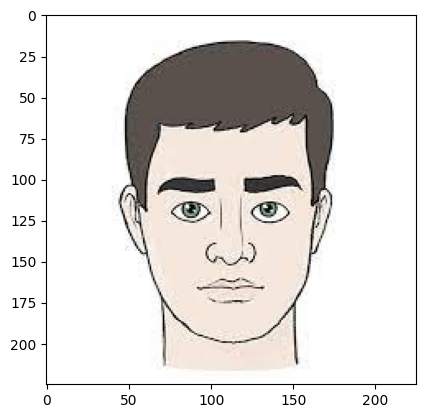

In [94]:
plt.imshow(image)

In [95]:
import cv2
import numpy as np

def segment(image):
    # Create a copy of the input image
    segmented_image = image.copy()

    # Convert the image to float64 for calculations
    image = np.float64(image)

    # Define the components to segment with their respective properties
    components = {
        'nose': {
            'seed': (110, 140),
            'color': [0, 0, 255],
            'threshold': 70,
        },
        'left_ear': {
            'seed': (115, 48),
            'color': [0, 255, 0],
            'threshold': 70,
        },
        'right_ear': {
            'seed': (130, 165),
            'color': [255, 0, 0],
            'threshold': 45,
        },
        'neck': {
            'seed': (200, 100),
            'color': [0, 255, 255],
            'threshold': 20,
        },
    }

    # Iterate over the components
    for component in components.values():
        # Extract the properties for the current component
        seed = component['seed']
        seed_color = component['color']
        seed_threshold = component['threshold']
        
        # Calculate the absolute difference between the image and the seed pixel
        diff_image = np.abs(image - image[seed[0], seed[1]]).astype(np.uint8)
        
        # Convert the difference image to grayscale
        gray_image = cv2.cvtColor(diff_image, cv2.COLOR_RGB2GRAY)
        
        # Create a binary mask based on the threshold
        mask = (gray_image < seed_threshold).astype(np.uint8)
        
        # Initialize a queue and visited array for region growing
        queue = []
        visited = np.zeros((image.shape[0] + 1, image.shape[1] + 1), dtype=np.uint8)
        
        # Add the seed pixel to the queue
        queue.append(seed)
        
        # Region growing algorithm
        while len(queue) > 0:
            # Get the current pixel coordinates from the queue
            x, y = queue.pop(0)
            
            # Check if the pixel has been visited or lies outside the image boundaries
            if visited[x][y] == 1 or x < 0 or x >= image.shape[0] or y < 0 or y >= image.shape[1] or mask[x, y] == 0:
                continue
            
            # Set the color of the segmented pixel
            segmented_image[x, y] = seed_color
            
            # Mark the pixel as visited
            visited[x][y] = 1
            
            # Add the neighboring pixels to the queue
            queue.extend([(x + 1, y), (x - 1, y), (x, y + 1), (x, y - 1)])

    # Return the segmented image
    return segmented_image


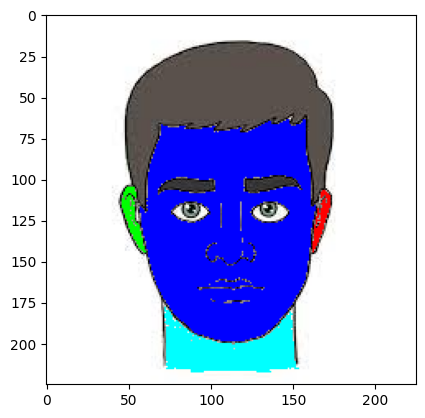

In [96]:
segmented_image = segment(image)
plt.imshow(segmented_image)